# ADULT INCOME DATASET

In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import pickle
import pymongo
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
le = LabelEncoder()

In [3]:
df = pd.read_csv("C://Users//MGC//Downloads//adult.data", names=["Age", "Workclass", "fnlwgt", "Education", "Education_num", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Annual_Income"])

In [4]:
df.head()

,Age,Workclass,fnlwgt,Education,Education_num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual_Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Annual_Income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


## FEATURE INFORMATION

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### NUMERIC AND CATEGORICAL FEATURES

In [6]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('numerical features : {}'.format(numeric_features))
print('categorical features : {}'.format(categorical_features))

numerical features : ['Age', 'fnlwgt', 'Education_num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']
categorical features : ['Workclass', 'Education', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country', 'Annual_Income']


In [7]:
# proportion of count data on categorical columns
for col in categorical_features:
    value_counts = df[col].value_counts(normalize=True) * 100
    result_df = pd.DataFrame({f'{col} Value': value_counts.index, 'Proportion (%)': value_counts.values})
    
    print(f"\nProportion of Count Data for {col}:\n")
    print(result_df)
    print('---------------------------')


Proportion of Count Data for Workclass:

     Workclass Value  Proportion (%)
0            Private       69.703019
1   Self-emp-not-inc        7.803814
2          Local-gov        6.427935
3                  ?        5.638647
4          State-gov        3.986364
5       Self-emp-inc        3.427413
6        Federal-gov        2.948312
7        Without-pay        0.042996
8       Never-worked        0.021498
---------------------------

Proportion of Count Data for Education:

   Education Value  Proportion (%)
0          HS-grad       32.250238
1     Some-college       22.391818
2        Bachelors       16.446055
3          Masters        5.291607
4        Assoc-voc        4.244341
5             11th        3.608612
6       Assoc-acdm        3.276926
7             10th        2.865391
8          7th-8th        1.983969
9      Prof-school        1.768987
10             9th        1.578576
11            12th        1.329812
12       Doctorate        1.268389
13         5th-6th        1.

## PRE-PROCESSING

In [9]:
df['Annual_Income'] = df['Annual_Income'].replace([" <=50K"," >50K"],[0, 1])
df["Sex"] = df["Sex"].replace([" Male", " Female"], [0,1])
df["Native-country"] = df["Native-country"].replace([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',' Ireland', ' Hungary', ' Holand-Netherlands'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42])
df['Relationship'] = df['Relationship'].replace([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',' Other-relative'], [1,2,3,4,5,6])
df["Race"] = df["Race"].replace([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other'], [1,2,3,4,5])
df["Marital-status"] = df['Marital-status'].replace([' Never-married',' Married-civ-spouse', ' Divorced',' Married-spouse-absent',' Separated', ' Married-AF-spouse',' Widowed'], [1,2,3,4,5,6,7])
df["Workclass"] =df["Workclass"].replace([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',' Never-worked'], [1,2,3,4,5,6,7,8,9])
df["Occupation"] = df["Occupation"].replace([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',' Priv-house-serv'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [10]:
df =df.drop("Education" , axis = 1)

In [11]:
df

,Age,Workclass,fnlwgt,Education_num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Annual_Income
0,39,1,77516,13,1,1,1,1,0,2174,0,40,1,0
1,50,2,83311,13,2,2,2,1,0,0,0,13,1,0
2,38,3,215646,9,3,3,1,1,0,0,0,40,1,0
3,53,3,234721,7,2,3,2,2,0,0,0,40,1,0
4,28,3,338409,13,2,4,3,2,1,0,0,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,12,2,11,3,1,1,0,0,38,1,0
32557,40,3,154374,9,2,10,2,1,0,0,0,40,1,1
32558,58,3,151910,9,7,1,5,1,1,0,0,40,1,0
32559,22,3,201490,9,1,1,4,1,0,0,0,20,1,0


# EXPLORATORY DATA ANALYSIS

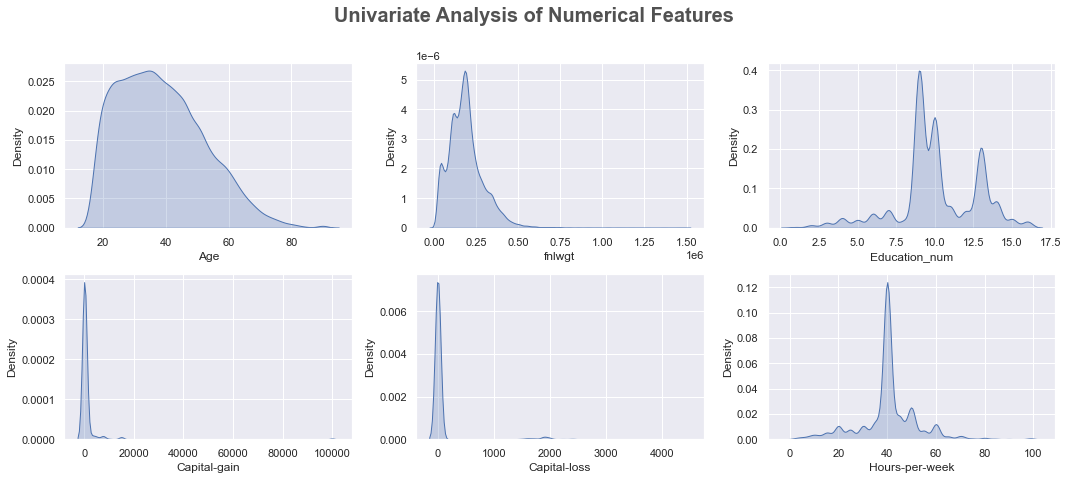

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

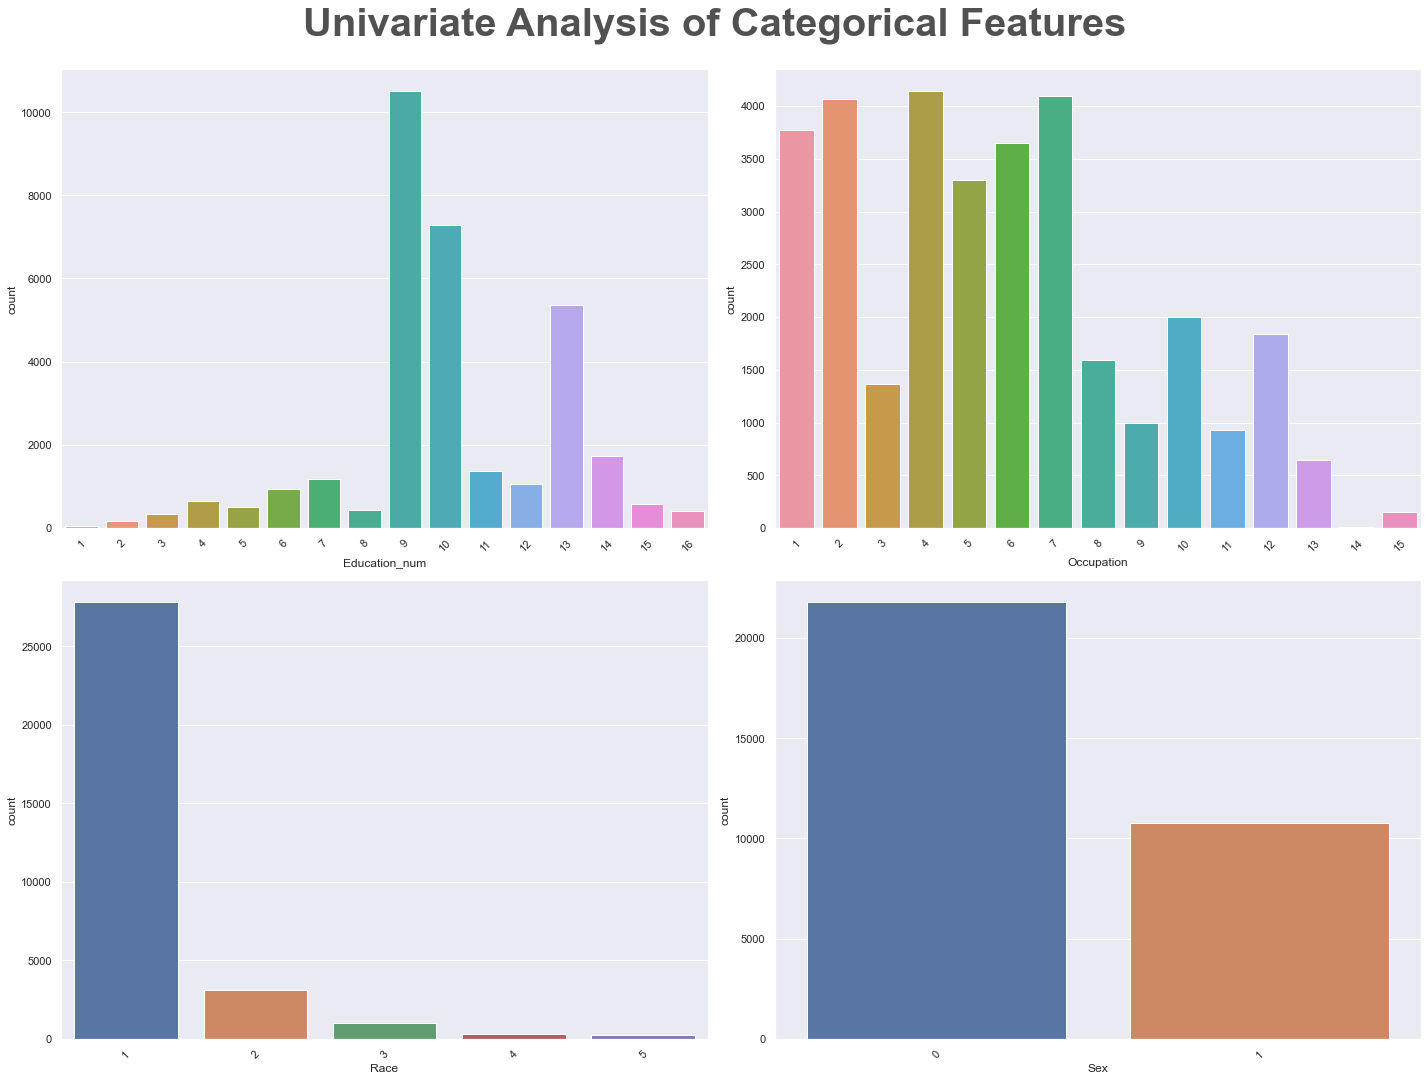

In [13]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=40, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['Education_num', 'Occupation', 'Race', 'Sex']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [14]:
data = df[(list(df.columns))].corr()

**Data Correlation**

<AxesSubplot:>

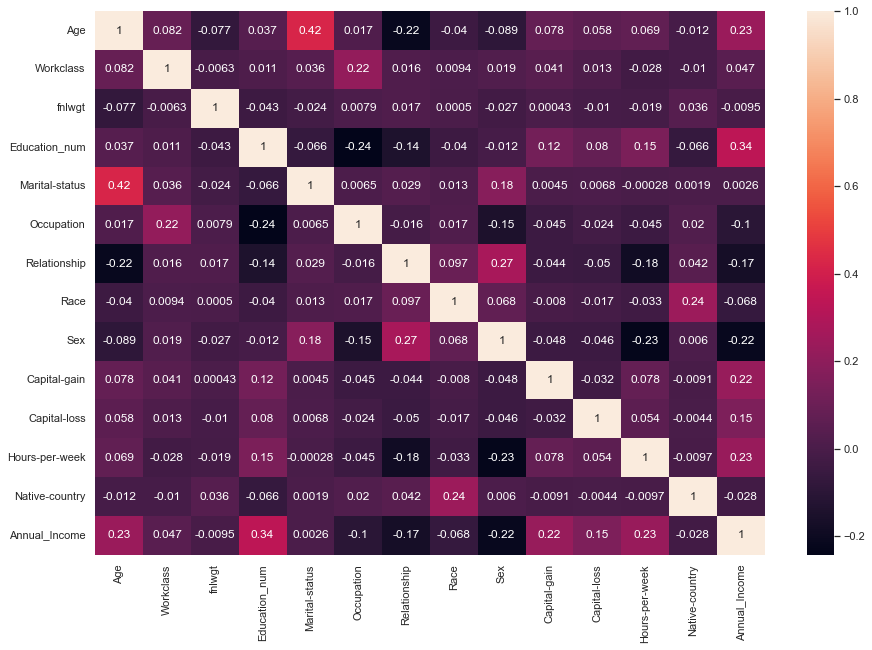

In [15]:
plt.figure(figsize = (15,10))
sns.heatmap(data, annot= True)

In [16]:
df = df.drop("fnlwgt", axis=1)

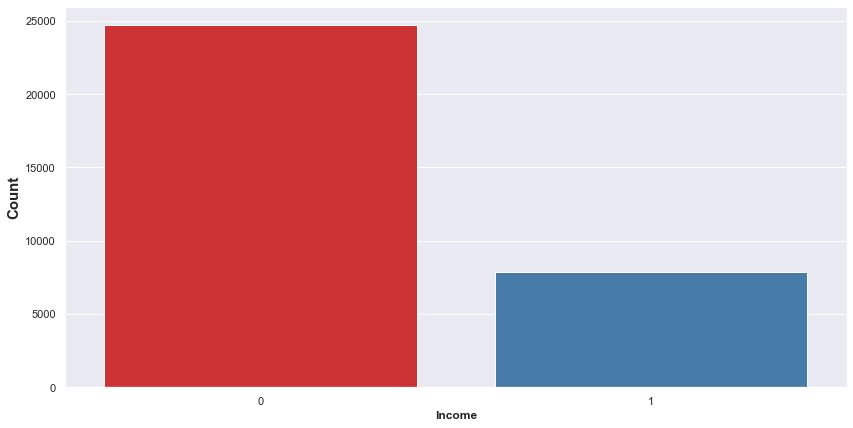

In [17]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Annual_Income', data=df,palette="Set1")
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Income", weight="bold", fontsize=12)
plt.show() 

C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Hours per week vs Annual income'}, xlabel='Annual_Income', ylabel='Hours-per-week'>

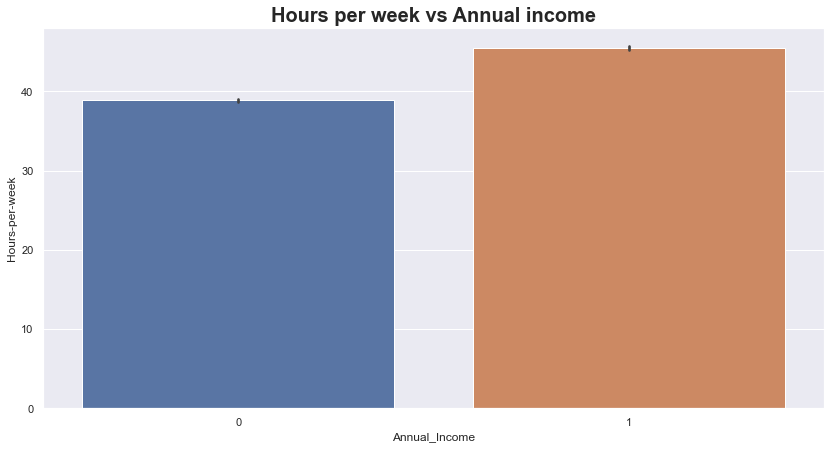

In [18]:
plt.subplots(figsize=(14,7))
plt.title("Hours per week vs Annual income",weight="bold",fontsize=20)
sns.barplot("Annual_Income","Hours-per-week", data= df)

C:\Users\MGC\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot:>

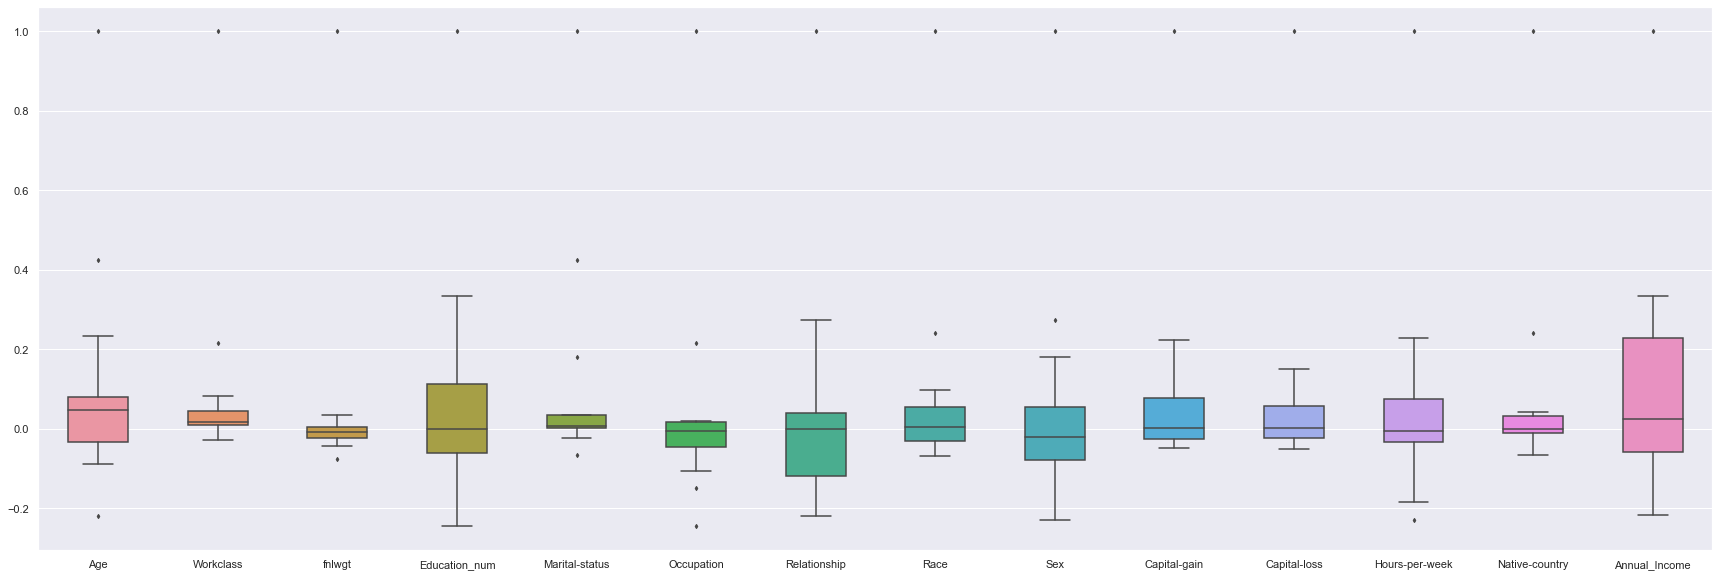

In [22]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Capital-gain vs Annual income'}, xlabel='Annual_Income', ylabel='Capital-gain'>

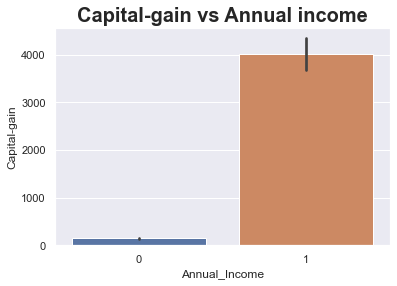

In [23]:
plt.title("Capital-gain vs Annual income",weight="bold",fontsize=20)

sns.barplot(df["Annual_Income"], df["Capital-gain"] )

In [24]:
df.isnull().sum()

Age               0
Workclass         0
Education_num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Annual_Income     0
dtype: int64

In [25]:
X = df.drop(columns = ['Annual_Income'])
y = df['Annual_Income']

In [26]:
X

,Age,Workclass,Education_num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country
0,39,1,13,1,1,1,1,0,2174,0,40,1
1,50,2,13,2,2,2,1,0,0,0,13,1
2,38,3,9,3,3,1,1,0,0,0,40,1
3,53,3,7,2,3,2,2,0,0,0,40,1
4,28,3,13,2,4,3,2,1,0,0,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,2,11,3,1,1,0,0,38,1
32557,40,3,9,2,10,2,1,0,0,0,40,1
32558,58,3,9,7,1,5,1,1,0,0,40,1
32559,22,3,9,1,1,4,1,0,0,0,20,1


In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Annual_Income, Length: 32561, dtype: int64

C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MGC\anaconda3\lib\s

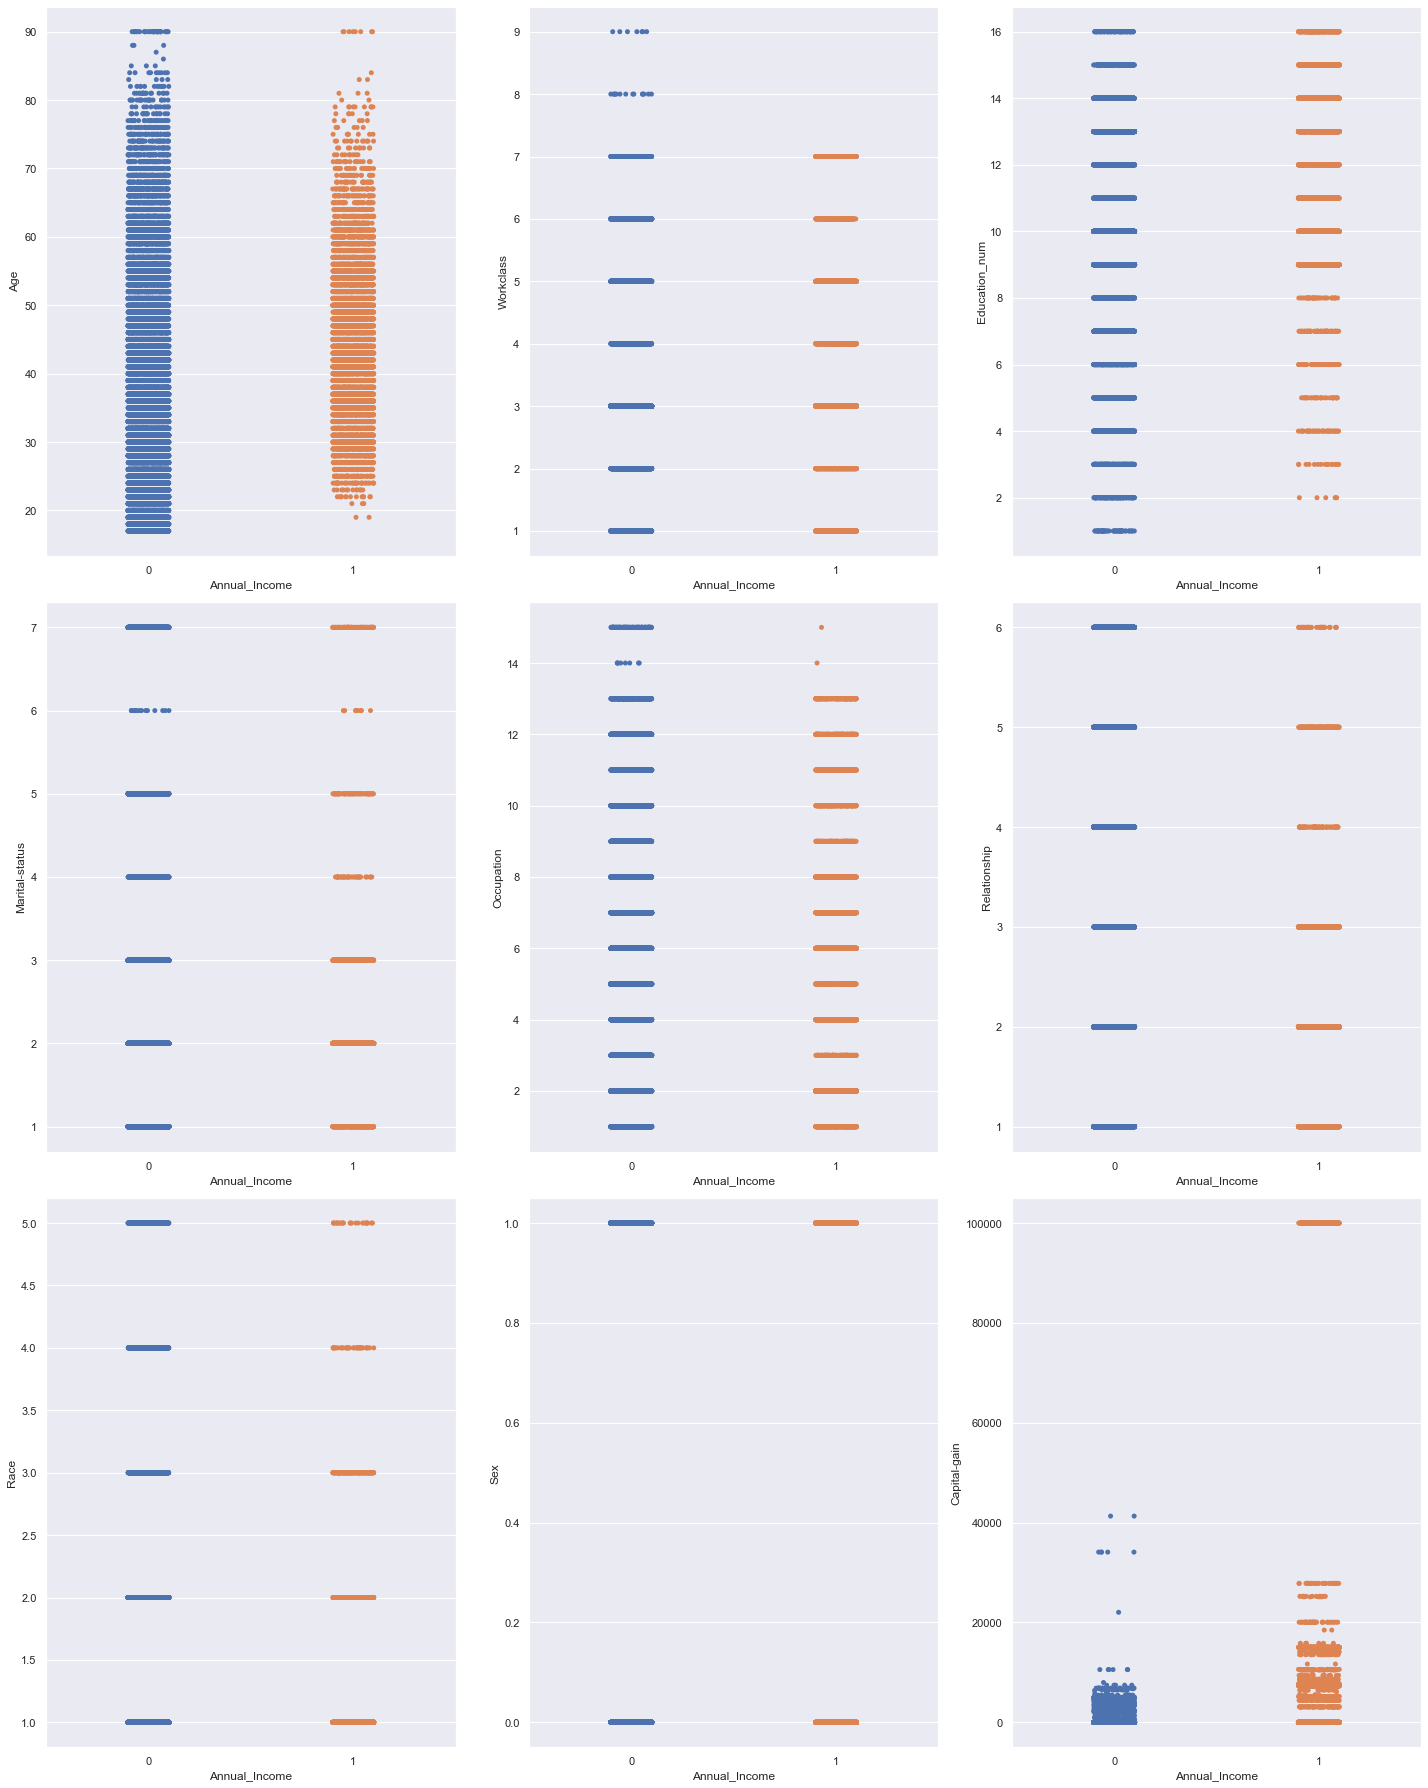

In [28]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [29]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [30]:
X_scaled

array([[ 0.03067056, -1.88460023,  1.13473876, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [ 0.83710898, -1.0687461 ,  1.13473876, ..., -0.21665953,
        -2.22215312, -0.25574647],
       [-0.04264203, -0.25289198, -0.42005962, ..., -0.21665953,
        -0.03542945, -0.25574647],
       ...,
       [ 1.42360965, -0.25289198, -0.42005962, ..., -0.21665953,
        -0.03542945, -0.25574647],
       [-1.21564337, -0.25289198, -0.42005962, ..., -0.21665953,
        -1.65522476, -0.25574647],
       [ 0.98373415,  3.01052452, -0.42005962, ..., -0.21665953,
        -0.03542945, -0.25574647]])

**Variance Inflation Factor**

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.345480,Age
1,1.069024,Workclass
2,1.135059,Education_num
3,1.317040,Marital-status
4,1.156025,Occupation
5,1.175446,Relationship
6,1.073999,Race
7,1.220044,Sex
8,1.030227,Capital-gain
9,1.015302,Capital-loss


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

## LOGISTIC REGRESSION

In [33]:
reg = LogisticRegression()

reg.fit(x_train,y_train)

LogisticRegression()

**PICKLING**

In [34]:
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [35]:
y_pred = reg.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8259427588748312

**CONFUSION MATRIX**

In [37]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[5820,  354],
       [1063,  904]], dtype=int64)

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

**ACCURACY**

In [39]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8259427588748312

**PRECISION**

In [40]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9426627793974732

**RECALL**

In [41]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8455615284033126

**F1_SCORE**

In [42]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8914758367159379

**ROC AUC SCORE**

In [43]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7011229504511514

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

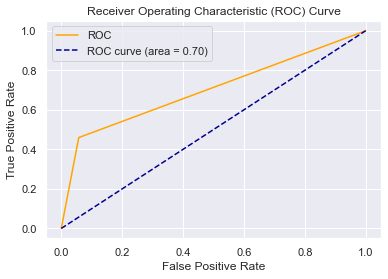

In [45]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## SVM KERNEL

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.815501781107972

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8264340990050363

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8432624984645621

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.7352905048519838

## HYPERPARAMETER TUNING

In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['rbf'], 'C':[1, 10]}

In [51]:
svc = SVC()

In [52]:
clf = GridSearchCV(svc, parameters)

In [53]:
clf.fit(x_train, y_train )

GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'kernel': ['rbf']})

In [54]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [55]:
y_predict = clf.predict(x_test)

In [56]:
accuracy = clf.best_score_ *100

In [57]:
accuracy

85.35626535626537